## 01.kNN基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 实现我们自己的 kNN

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

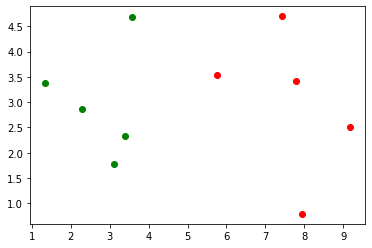

In [6]:
# X_train[y_train==0,1] 表示：分类(y_train)为0 的点的纵坐标的 list
# X_train[y_train==1,0] 表示：分类(y_train)为1 的点的横坐标的 list
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

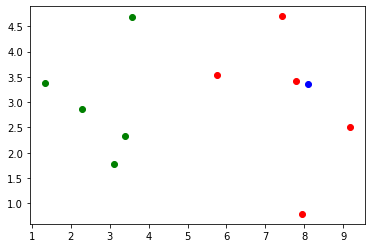

In [7]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

### kNN的过程

In [8]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)

In [9]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [10]:
# argsort 函数是对list排序，并返回每个元素对应的index
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [11]:
nearest = np.argsort(distances)

In [12]:
k = 6

In [13]:
topK_y = []
for neighbor in nearest[:k]:
    topK_y.append(y_train[neighbor])

topK_y

[1, 1, 1, 1, 1, 0]

In [14]:
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [15]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [16]:
votes.most_common(1)

[(1, 5)]

In [17]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

## 02 scikit-learn 中的 kNN

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])

In [20]:
%run playML/kNN_function/kNN.py

In [21]:
predict_y = kNN_classify(6, X_train, y_train, x)
predict_y

1

### 使用scikit-learn中的kNN


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [24]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
x = np.array([8.093607318, 3.365731514])

In [25]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [26]:
X_predict = x.reshape(1, -1)

In [27]:
X_predict

array([[8.09360732, 3.36573151]])

In [28]:
kNN_classifier.predict(X_predict)

array([1])

In [29]:
y_predict = kNN_classifier.predict(X_predict)

In [30]:
y_predict[0]

1

### 重新整理我们的kNN的代码

In [35]:
%run ./kNN.py

Exception: File `'./kNN.py'` not found.

In [32]:
knn_clf = KNNClassifier(3)

NameError: name 'KNNClassifier' is not defined

In [ ]:
knn_clf.fit(X_train, y_train)

In [ ]:
y_predict = knn_clf.predict(X_predict)

In [ ]:
y_predict

In [ ]:
y_predict[0]

## 03 测试我们的算法

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

In [ ]:
iris = datasets.load_iris()
iris.keys()

In [ ]:
X = iris.data

In [ ]:
y = iris.target

In [ ]:
X.shape

In [ ]:
y.shape

### train_test_split

分离出一部分数据做训练，另外一部分数据做测试。

In [ ]:
y

In [ ]:

shuffled_indexes = np.random.permutation(len(X))
shuffled_indexes

In [ ]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [ ]:
test_indexes = shuffled_indexes[:test_size] # 索引从 0~test_size 为测试数据
train_indexes = shuffled_indexes[test_size:] # 索引从 0~test_size 为测试数据

In [ ]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

### 封装

In [ ]:
from playML.model_selection import train_test_split

In [ ]:
X

In [ ]:
y

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X, y)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

### 测试我们的算法

In [ ]:
from playML.kNN import KNNClassifier

In [ ]:
my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)

In [ ]:
y_predict = my_knn_clf.predict(X_test)

In [ ]:
y_predict

In [ ]:
y_test

In [ ]:
sum(y_predict == y_test)

In [ ]:
sum(y_predict == y_test) / len(y_test)

### sklearn中的train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

## 04 分类准确度

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()
digits.keys()

In [ ]:
print(digits.DESCR)

In [ ]:
X = digits.data
X.shape

In [ ]:
y = digits.target
y.shape

In [ ]:
y[:100]

In [ ]:
X[:3]

In [ ]:
some_digit = X[666]
some_digit_image = some_digit.reshape(8, 8)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [ ]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)


In [ ]:
from playML.kNN import KNNClassifier

my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

In [ ]:
sum(y_predict == y_test) / len(y)

### 封装我们自己的accuracy_score

In [ ]:
from playML.metrics import accuracy_score

accuracy_score(y_test, y_predict)

In [ ]:
my_knn_clf.score(X_test, y_test)